In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import math
import time
import datetime
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from tabulate import tabulate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
import statistics

In [2]:
dataset_2011 = pd.read_csv('https://raw.githubusercontent.com/EduardoZaRo/Mineria-de-datos-571/main/Proyecto/gt_2011.csv')
dataset_2012 = pd.read_csv('https://raw.githubusercontent.com/EduardoZaRo/Mineria-de-datos-571/main/Proyecto/gt_2012.csv')
dataset_2013 = pd.read_csv('https://raw.githubusercontent.com/EduardoZaRo/Mineria-de-datos-571/main/Proyecto/gt_2013.csv')
dataset_2014 = pd.read_csv('https://raw.githubusercontent.com/EduardoZaRo/Mineria-de-datos-571/main/Proyecto/gt_2014.csv')
dataset_2015 = pd.read_csv('https://raw.githubusercontent.com/EduardoZaRo/Mineria-de-datos-571/main/Proyecto/gt_2015.csv')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


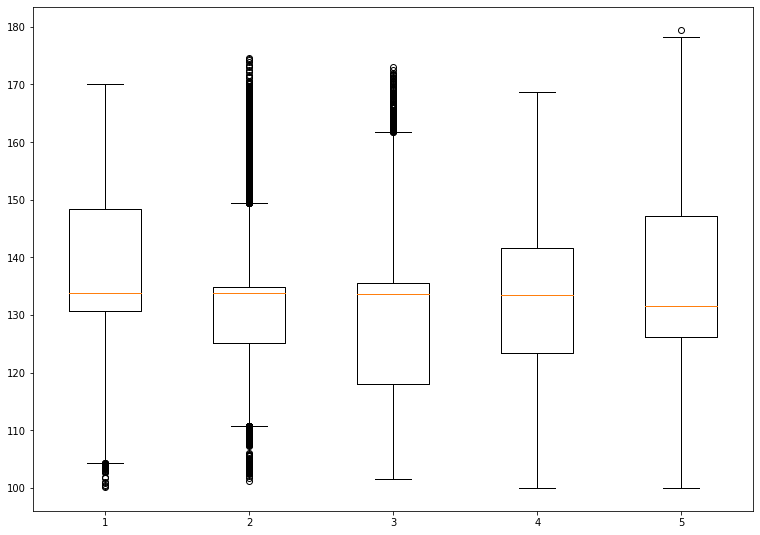

In [3]:
data = [dataset_2011['TEY'], dataset_2012['TEY'],dataset_2013['TEY'],dataset_2014['TEY'],dataset_2015['TEY']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.show()

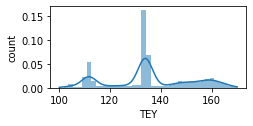

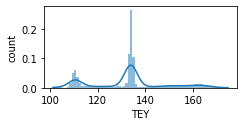

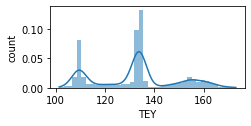

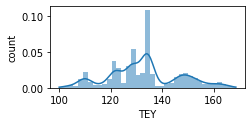

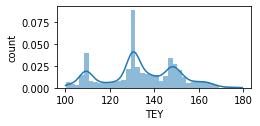

In [4]:
def histogramas_TEY(dataset):
    fig = plt.figure(figsize=(15, 10))
    atributos = list(dataset.columns.values )
    plt.subplot (math.ceil(dataset.shape[1]/2), math.floor(dataset.shape[1]/2), 1)
    #plt.hist(dataset['TEY'], bins=20, edgecolor='black')
    sn.histplot(dataset['TEY'], kde=True, stat="density", linewidth=0)
    plt.xlabel ('TEY')
    plt.ylabel ('count')
    fig.tight_layout()
    plt.show()
histogramas_TEY(dataset_2011)
histogramas_TEY(dataset_2012)
histogramas_TEY(dataset_2013)
histogramas_TEY(dataset_2014)
histogramas_TEY(dataset_2015)

In [5]:
print(dataset_2011['TEY'].median())
print(dataset_2012['TEY'].median())
print(dataset_2013['TEY'].median())
print(dataset_2014['TEY'].median())
print(dataset_2015['TEY'].median())

133.81
133.76
133.57
133.42
131.6


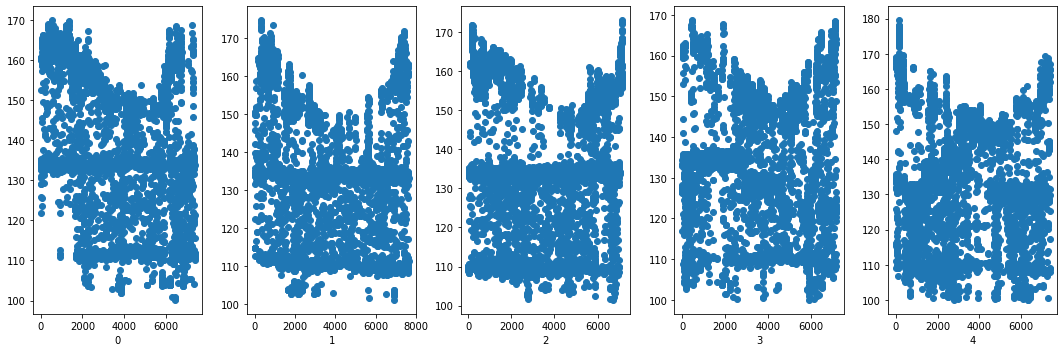

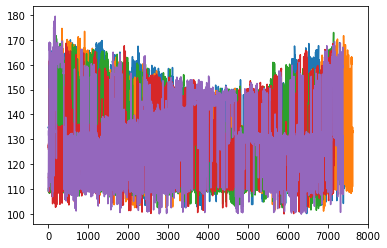

In [6]:
fig = plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot (1, 5, i+1)
    plt.scatter(np.arange(len(data[i])),data[i])
    plt.xlabel (i)
fig.tight_layout()
plt.show()

dataset_2011['TEY'].plot()
dataset_2012['TEY'].plot()
dataset_2013['TEY'].plot()
dataset_2014['TEY'].plot()
dataset_2015['TEY'].plot()

In [7]:
dataset = pd.concat([dataset_2011, dataset_2012, dataset_2013, dataset_2014, dataset_2015], axis=0)
dataset = dataset.reset_index()
dataset.pop('index')

0           0
1           1
2           2
3           3
4           4
         ... 
36728    7379
36729    7380
36730    7381
36731    7382
36732    7383
Name: index, Length: 36733, dtype: int64

# **Preprocesamiento del dataset**

In [8]:
dataset

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [9]:
dataset.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,36733.0,17.712726,7.447451,-6.234800,11.7810,17.8010,23.6650,37.1030
AP,36733.0,1013.070165,6.463346,985.850000,1008.8000,1012.6000,1017.0000,1036.6000
AH,36733.0,77.867015,14.461355,24.085000,68.1880,80.4700,89.3760,100.2000
AFDP,36733.0,3.925518,0.773936,2.087400,3.3556,3.9377,4.3769,7.6106
GTEP,36733.0,25.563801,4.195957,17.698000,23.1290,25.1040,29.0610,40.7160
TIT,36733.0,1081.428084,17.536373,1000.800000,1071.8000,1085.9000,1097.0000,1100.9000
TAT,36733.0,546.158517,6.842360,511.040000,544.7200,549.8800,550.0400,550.6100
TEY,36733.0,133.506404,15.618634,100.020000,124.4500,133.7300,144.0800,179.5000
CDP,36733.0,12.060525,1.088795,9.851800,11.4350,11.9650,12.8550,15.1590
CO,36733.0,2.372468,2.262672,0.000388,1.1824,1.7135,2.8429,44.1030


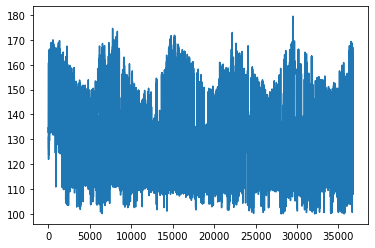

In [12]:
dataset['TEY'].plot()

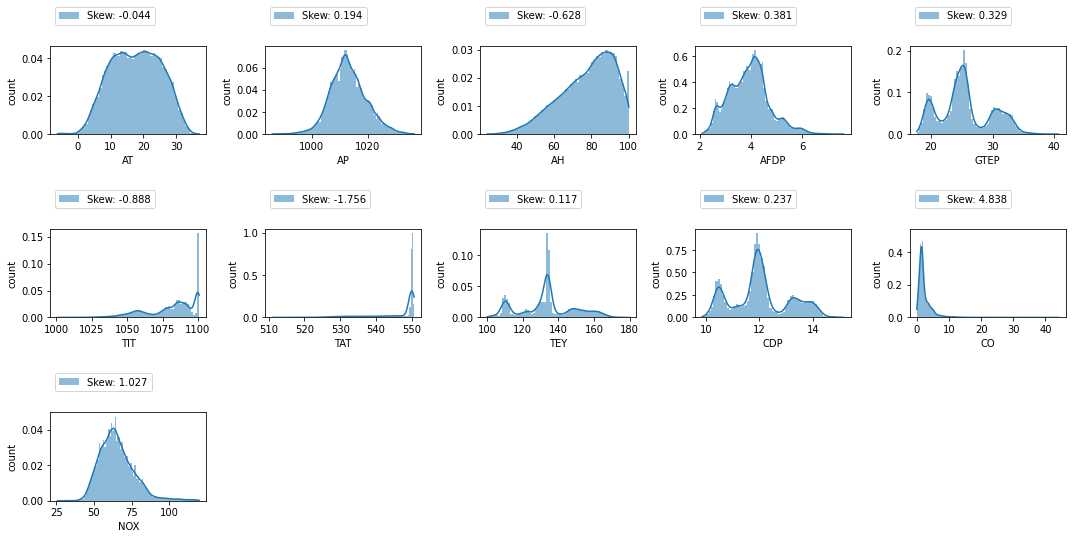

In [13]:
def histogramas(dataset):
    fig = plt.figure(figsize=(15, 15))
    atributos = list(dataset.columns.values )
    for i in range(len(atributos)):
        plt.subplot (math.ceil(dataset.shape[1]/2), math.floor(dataset.shape[1]/2), i+1)
        #plt.hist(dataset[atributos[i]], bins=30, edgecolor='black')
        sn.histplot(dataset[atributos[i]], kde=True, stat="density", linewidth=0, label="Skew: {:.3f}".format(dataset[atributos[i]].skew()))
        plt.legend(loc = 'upper left', bbox_to_anchor=(0, 1.5))
        plt.xlabel (atributos[i])
        plt.ylabel ('count')
    fig.tight_layout()
    plt.show()
histogramas(dataset)


In [ ]:
#dataset.iloc[:,0:] = normalize(dataset)
#print(dataset)

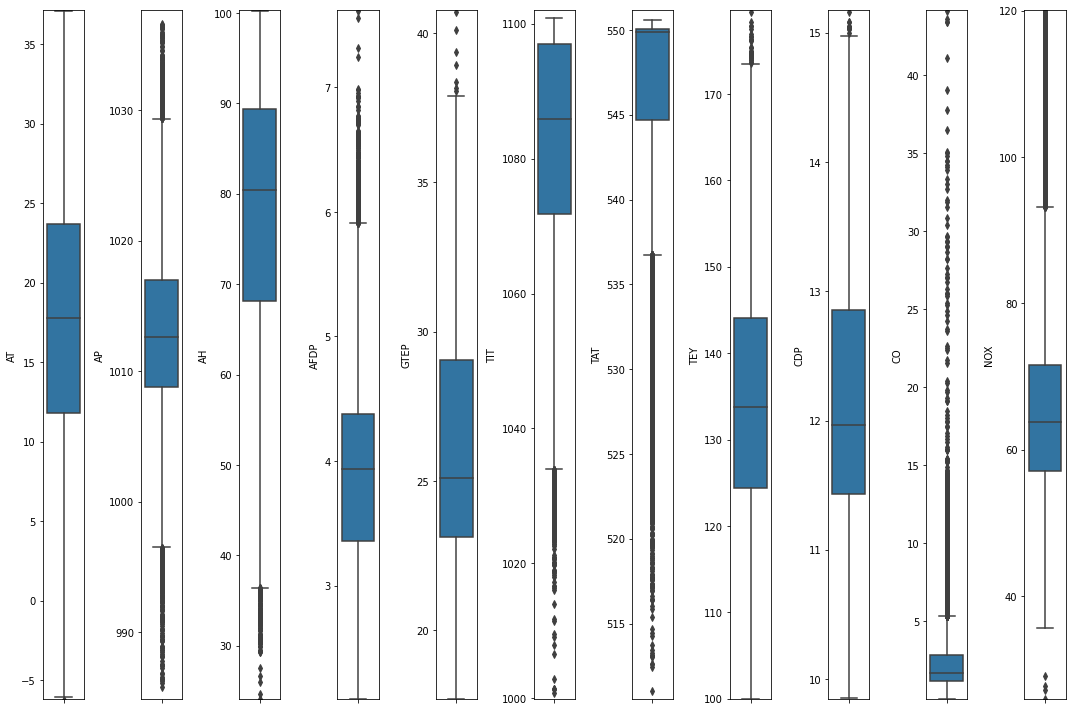

In [14]:
def boxplots(dataset):
    columns = list(dataset.columns)
    fig, axes = plt.subplots(1, len(columns), figsize=(15, 10))
    for i, col in enumerate(columns):
        ax = sn.boxplot(y=dataset[col], ax=axes.flatten()[i])
        ax.set_ylim(dataset[col].min()-dataset[col].min()*0.001, dataset[col].max()+dataset[col].max()*0.001)
        ax.set_ylabel(col)
    fig.tight_layout()
    plt.show()
boxplots(dataset)

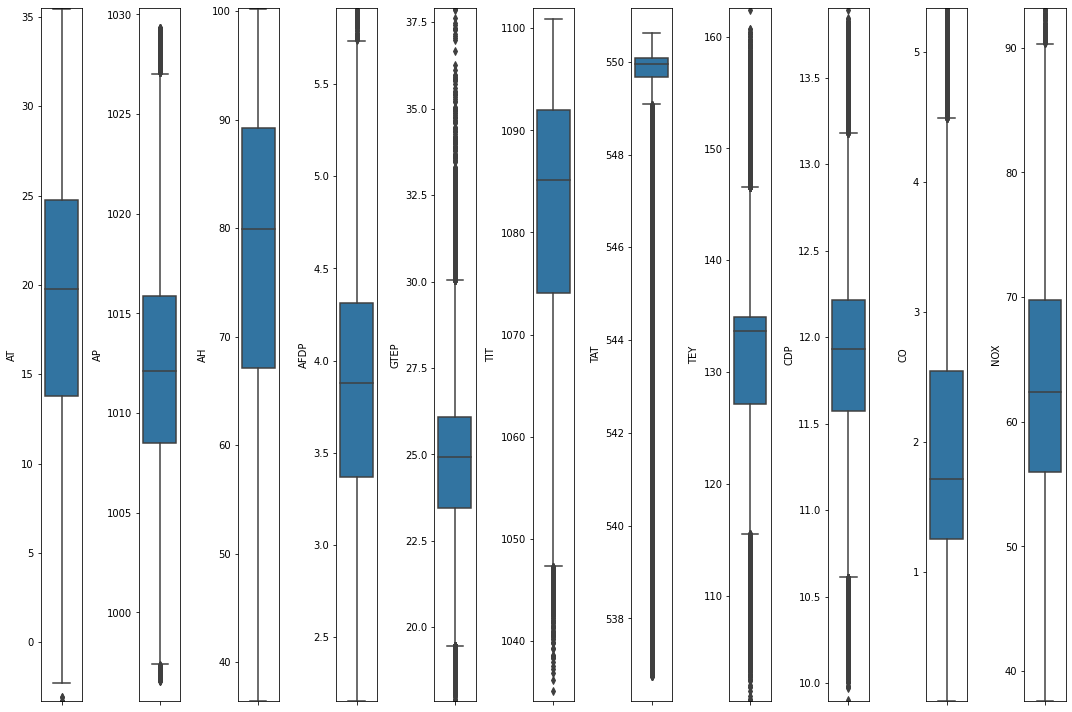

In [15]:
#Remover outliers por rango intercuantil
dataset_sin_anomalias = dataset
atributos = list(dataset_sin_anomalias.columns.values)
for i in atributos:
    q1 = dataset[i].quantile(0.25)
    q3  = dataset[i].quantile(0.75)
    qr = q3-q1
    q3 = q3+1.5*qr
    q1 = q1-1.5*qr
    dataset_sin_anomalias = dataset_sin_anomalias[(dataset_sin_anomalias[i] <= q3) & (dataset_sin_anomalias[i] >= q1)]
boxplots(dataset_sin_anomalias)
dataset = dataset_sin_anomalias

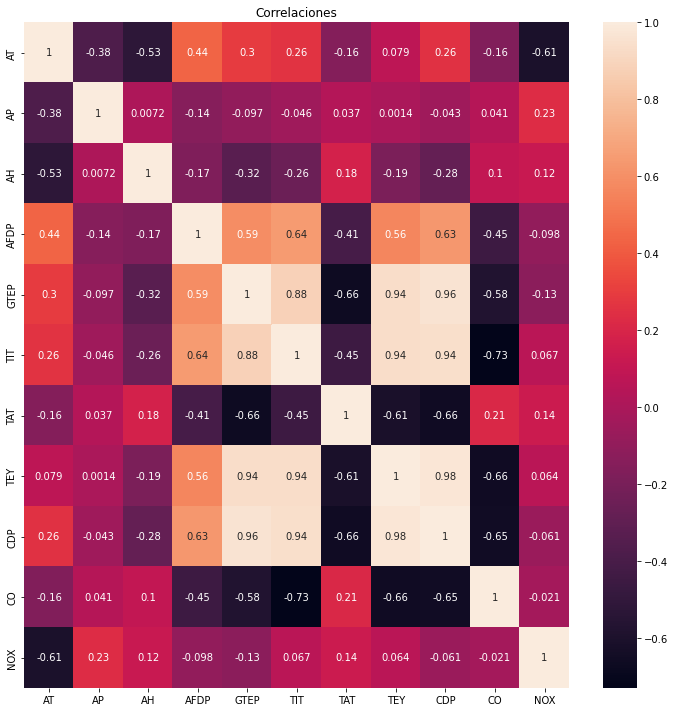

In [16]:
corr_matrix = dataset.corr()
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
sn.heatmap(corr_matrix,annot = True)
ax.set_title('Correlaciones')
fig.tight_layout()
plt.show()

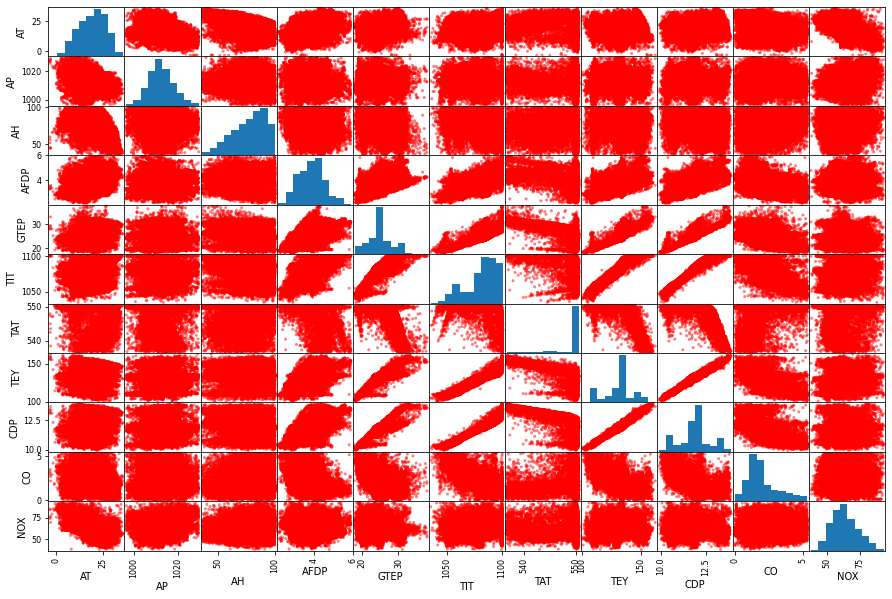

In [17]:
pd.plotting.scatter_matrix(dataset, figsize = (15,10), color = 'Red')
plt.show()

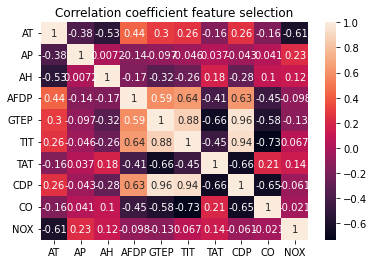

Correlacion propone borrar: ['CDP']


In [18]:
def corr_coef(dataset, threshold):
    corr_matrix = dataset.corr()
    ax = plt.axes()
    sn.heatmap(corr_matrix,annot = True)
    ax.set_title('Correlation coefficient feature selection')
    plt.show()
    corr_matrix = features.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] >= threshold)]
    return to_drop
features = dataset.drop('TEY', axis = 1)
to_drop = corr_coef(features, 0.95)
print("Correlacion propone borrar:",to_drop)

In [19]:
dataset_procesado = dataset.drop(to_drop, axis = 1)
print(dataset_procesado)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67   
...       ...     ...     ...     ...     ...     ...     ...     ...   
36707  2.8040  1028.5  85.691  3.3807  22.541  1072.4  549.83  127.91   
36708  2.4584  1028.6  85.003  3.3503  22.643  1073.1  549.81  128.65   
36709  2.6604  1028.7  85.115  3.8577  26.630  1085.2  543.74  143.26   
36726  3.4218  1028.7  91.003  3.6911  22.859  1073.5  549.78  129.86   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41   

            CO     NOX  
0      0.32663  81.952  
1      0.44784  82.377  
2      0.45144  83.776  
3      0.23107  82.505 

In [20]:
dataset_procesado.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
TIT     0.938548
GTEP    0.935239
AFDP    0.561846
AT      0.078913
NOX     0.063745
AP      0.001396
AH     -0.188136
TAT    -0.610357
CO     -0.661107
Name: TEY, dtype: float64

# **Parte de regresion**

In [31]:
class regressor():
    """
    Clase para hacer regresiones
    Soporta los splitters: [holdout,random_subsampling,kfold]
    Soporta los regresores: [linear, decisiontree, kneighbors]
    
    regressor(self, X, y, split_method: str, regressor: str, k=None, train_size=None)
    
    Se tienen los metodos:
        regression: Hace el fit y predict
        getMetrics: Retorna r,r2,sse,mae,mse,rmse
    """
    def __init__(self, X, y, split_method: str, regressor: str, k=None, train_size=None):
        self.X = X
        self.y = y
        self.split_method = split_method
        self.regressor = regressor
        self.k = k if k else None
        self.train_size = train_size if train_size else None
        self.y_train = []
        self.y_test = []
        self.X_train = []
        self.X_test = []
        self.y_pred = []
        self.fit = []
        self.metrics = [0,0,0,0,0,0]
        self.multioutput = False
        try:
            if(y.shape[1] >= 2):
                self.multioutput = True
        except:
            self.multioutput = False
                
        print("Parametros recibidos:\n\t", split_method, regressor, k, train_size)
    def regression(self):
        if(self.split_method == 'holdout'):
            if(self.train_size == 1):
                X_train,X_test,y_train,y_test = self.X, self.X, self.y, self.y
            else:
                X_train,X_test,y_train,y_test = train_test_split(self.X, self.y, train_size=self.train_size)
        elif (self.split_method == 'random_subsampling'):
            cv = ShuffleSplit(n_splits=30)
        elif (self.split_method == 'kfold'):
            cv = KFold(n_splits=self.k, shuffle = True)
        else:
            print("Splitter no valido")
            return
            
        if(self.regressor == 'linear'):
            model = LinearRegression()
        elif(self.regressor == 'decisiontree'):
            model = DecisionTreeRegressor()
        elif(self.regressor == 'randomforest'):
            #model = RandomForestRegressor(n_estimators =5)
            '''
                {'n_estimators': 104,
                'min_samples_split': 7,
                'min_samples_leaf': 3,
                'max_depth': 14}

            '''
            model = RandomForestRegressor(max_depth = 14,  n_estimators = 104, min_samples_split =7, min_samples_leaf = 3)
        elif(self.regressor == 'kneighbors'):
            model = KNeighborsRegressor()
        elif(self.regressor == 'svm'):
            model = SVR()
        elif(self.regressor == 'sgd'):
            model = SGDRegressor()
        elif(self.regressor == 'mlp'):
            model = MLPRegressor(max_iter=500)
        else:
            print("Regressor no valido")
            return 
        
        
        if(self.split_method == 'holdout'):
            self.fit = model.fit(X_train, y_train)
            if(self.multioutput and self.regressor != 'decisiontree'):
                y_pred = MultiOutputRegressor(model).fit(X_train, y_train).predict(X_test)
            else:
                y_pred = model.fit(X_train, y_train).predict(X_test)
            self.y_pred = y_pred
            self.y_test = y_test
            self.X_test = X_test
            r, r2, sse, mae, mse, rmse = self.getInternalMetrics()
            self.metrics[0] = r 
            self.metrics[1] = r2 
            self.metrics[2] = sse 
            self.metrics[3] = mae 
            self.metrics[4] = mse 
            self.metrics[5] = rmse 
        else:
            metrics = {
                'r':  np.empty(0),
                'r2': np.empty(0),
                'sse': np.empty(0),
                'mae': np.empty(0),
                'mse': np.empty(0),
                'rmse': np.empty(0)
            }
            for train_index , test_index in cv.split(self.X):
                X_train , X_test = X[train_index,:],X[test_index,:]
                y_train , y_test = self.y[train_index] , self.y[test_index]
                if(self.multioutput):
                    y_pred = MultiOutputRegressor(model).fit(X_train, y_train).predict(X_test)
                else:
                    y_pred = model.fit(X_train, y_train).predict(X_test)
                self.fit = model.fit(X_train, y_train)
                self.y_test = y_test
                self.y_pred = y_pred
                self.X_test = X_test
                r, r2, sse, mae, mse, rmse = self.getInternalMetrics()
                metrics['r'] = np.append(metrics['r'], r)
                metrics['r2'] = np.append(metrics['r2'], r2)
                metrics['sse'] = np.append(metrics['sse'], sse)
                metrics['mae'] = np.append(metrics['mae'], mae)
                metrics['mse'] = np.append(metrics['mse'], mse)
                metrics['rmse'] = np.append(metrics['rmse'], rmse)
            self.metrics[0] = metrics['r'].mean()
            self.metrics[1] = metrics['r2'].mean()
            self.metrics[2] = metrics['sse'].mean()
            self.metrics[3] = metrics['mae'].mean()
            self.metrics[4] = metrics['mse'].mean()
            self.metrics[5] = metrics['rmse'].mean()
            
        self.y_pred = y_pred
        self.y_test = y_test
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
    def getInternalMetrics(self):
        sse = np.sum((self.y_test - self.y_pred)**2)
        mse = sse/len(self.y_test)
        rmse = np.sqrt(mse)
        mae = np.sum(np.abs((self.y_test - self.y_pred)))/len(self.y_test)
        r2 = r2_score(self.y_test, self.y_pred) 
        r = np.corrcoef(self.y_test,self.y_pred)[1,0]
        return   r, r2, sse, mae, mse, rmse
    def getMetrics(self):
        """
        Devuelve metricas de regresion en el siguiente orden:
                r, r2, sse, mae, mse, rmse
        """
        y_pred = self.fit.predict(self.X)
        plt.scatter(np.arange(200), self.y[28303:], label="Y")
        plt.scatter(np.arange(200), y_pred[28303:], label="Y pred")

        plt.xlabel('Y')
        plt.ylabel('Y-pred')
        plt.legend(loc='best',fancybox=True, shadow=True)
        plt.grid(True)
        plt.show() 
        return  self.metrics[0],self.metrics[1],\
                self.metrics[2],self.metrics[3],\
                self.metrics[4],self.metrics[5]

In [25]:
copy = dataset_procesado.copy()
copy.pop('TEY')
labels = dataset_procesado.columns
X = dataset_procesado.loc[:, copy.columns].values
y = dataset_procesado.loc[:, 'TEY'].values
print("Features:\n", X)
print("Target:\n", y)

Features:
 [[4.5878e+00 1.0187e+03 8.3675e+01 ... 5.4983e+02 3.2663e-01 8.1952e+01]
 [4.2932e+00 1.0183e+03 8.4235e+01 ... 5.5005e+02 4.4784e-01 8.2377e+01]
 [3.9045e+00 1.0184e+03 8.4858e+01 ... 5.5019e+02 4.5144e-01 8.3776e+01]
 ...
 [2.6604e+00 1.0287e+03 8.5115e+01 ... 5.4374e+02 3.4526e+00 6.2330e+01]
 [3.4218e+00 1.0287e+03 9.1003e+01 ... 5.4978e+02 3.6738e+00 6.7737e+01]
 [5.8837e+00 1.0287e+03 9.4200e+01 ... 5.5011e+02 3.3134e+00 6.4738e+01]]
Target:
 [134.67 134.67 135.1  ... 143.26 129.86 131.41]


In [26]:
split_methods = ['holdout', 'random_subsampling', 'kfold', 'kfold']    
regression_methods = ['linear', 'decisiontree', 'kneighbors', 'sgd', 'randomforest', 'mlp']
   

Parametros recibidos:
	 holdout linear 5 0.6


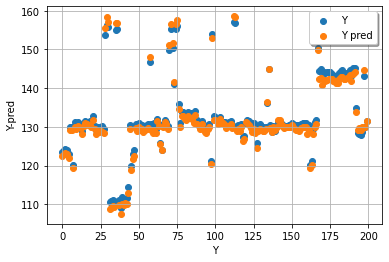

Parametros recibidos:
	 random_subsampling linear 30 0


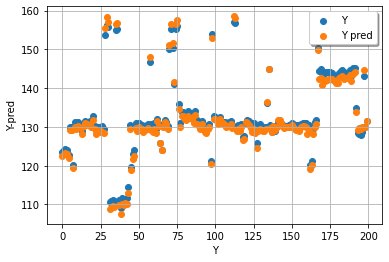

Parametros recibidos:
	 kfold linear 5 0


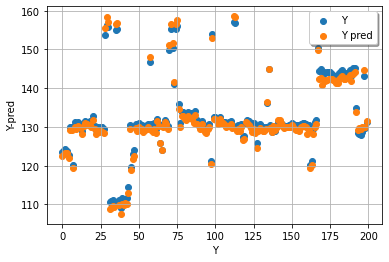

Parametros recibidos:
	 kfold linear 10 0


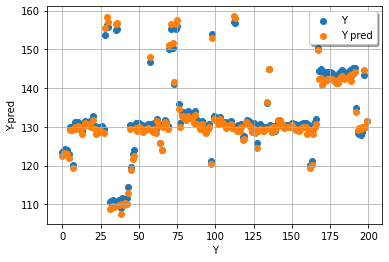

________________linear________________
╒════════════════════╤═══════╤═══════╤══════════╤═══════╤═══════╤════════╕
│ SPLIT METHOD       │     r │    r2 │      sse │   mae │   mse │   rmse │
╞════════════════════╪═══════╪═══════╪══════════╪═══════╪═══════╪════════╡
│ holdout            │ 0.992 │ 0.985 │ 23200.9  │ 1.077 │ 2.035 │  1.426 │
├────────────────────┼───────┼───────┼──────────┼───────┼───────┼────────┤
│ random_subsampling │ 0.992 │ 0.985 │  5794.74 │ 1.078 │ 2.033 │  1.425 │
├────────────────────┼───────┼───────┼──────────┼───────┼───────┼────────┤
│ kfold              │ 0.992 │ 0.985 │ 11601.8  │ 1.077 │ 2.035 │  1.427 │
├────────────────────┼───────┼───────┼──────────┼───────┼───────┼────────┤
│ kfold              │ 0.992 │ 0.985 │  5798.03 │ 1.076 │ 2.034 │  1.426 │
╘════════════════════╧═══════╧═══════╧══════════╧═══════╧═══════╧════════╛
Parametros recibidos:
	 holdout decisiontree 5 0.6


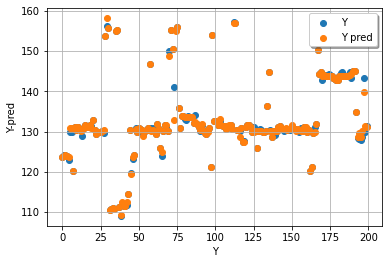

Parametros recibidos:
	 random_subsampling decisiontree 30 0


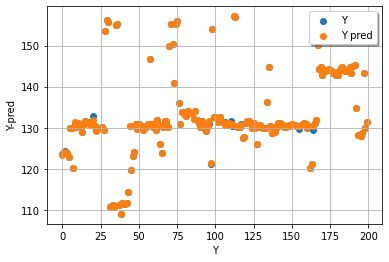

Parametros recibidos:
	 kfold decisiontree 5 0


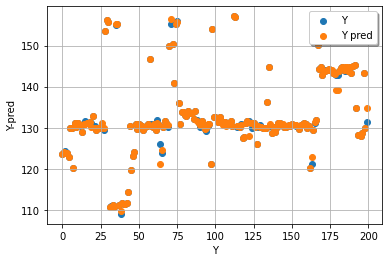

Parametros recibidos:
	 kfold decisiontree 10 0


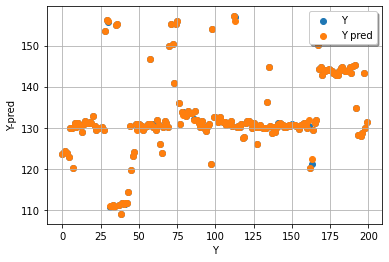

________________decisiontree________________
╒════════════════════╤═══════╤═══════╤══════════╤═══════╤═══════╤════════╕
│ SPLIT METHOD       │     r │    r2 │      sse │   mae │   mse │   rmse │
╞════════════════════╪═══════╪═══════╪══════════╪═══════╪═══════╪════════╡
│ holdout            │ 0.996 │ 0.993 │ 10873.7  │ 0.637 │ 0.954 │  0.977 │
├────────────────────┼───────┼───────┼──────────┼───────┼───────┼────────┤
│ random_subsampling │ 0.997 │ 0.994 │  2302.65 │ 0.578 │ 0.808 │  0.898 │
├────────────────────┼───────┼───────┼──────────┼───────┼───────┼────────┤
│ kfold              │ 0.997 │ 0.994 │  4731.08 │ 0.592 │ 0.83  │  0.911 │
├────────────────────┼───────┼───────┼──────────┼───────┼───────┼────────┤
│ kfold              │ 0.997 │ 0.994 │  2313.92 │ 0.581 │ 0.812 │  0.9   │
╘════════════════════╧═══════╧═══════╧══════════╧═══════╧═══════╧════════╛
Parametros recibidos:
	 holdout kneighbors 5 0.6


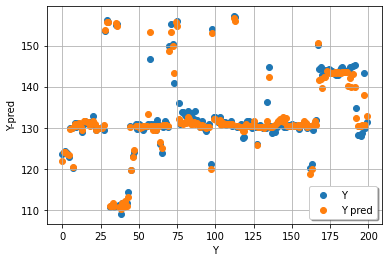

Parametros recibidos:
	 random_subsampling kneighbors 30 0


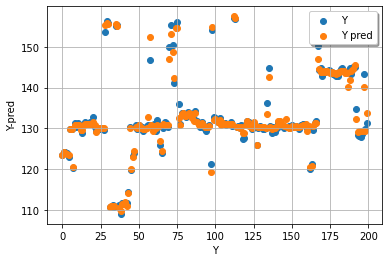

Parametros recibidos:
	 kfold kneighbors 5 0


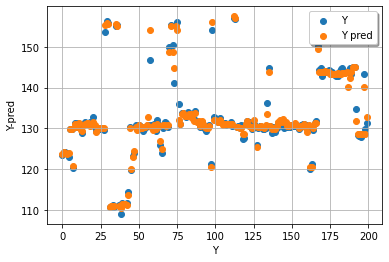

Parametros recibidos:
	 kfold kneighbors 10 0


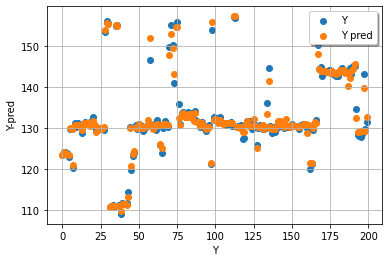

________________kneighbors________________
╒════════════════════╤═══════╤═══════╤══════════╤═══════╤═══════╤════════╕
│ SPLIT METHOD       │     r │    r2 │      sse │   mae │   mse │   rmse │
╞════════════════════╪═══════╪═══════╪══════════╪═══════╪═══════╪════════╡
│ holdout            │ 0.993 │ 0.987 │ 19294.3  │ 0.835 │ 1.692 │  1.301 │
├────────────────────┼───────┼───────┼──────────┼───────┼───────┼────────┤
│ random_subsampling │ 0.994 │ 0.989 │  4257.66 │ 0.773 │ 1.493 │  1.222 │
├────────────────────┼───────┼───────┼──────────┼───────┼───────┼────────┤
│ kfold              │ 0.994 │ 0.988 │  8969.41 │ 0.793 │ 1.573 │  1.254 │
├────────────────────┼───────┼───────┼──────────┼───────┼───────┼────────┤
│ kfold              │ 0.994 │ 0.989 │  4292.54 │ 0.776 │ 1.506 │  1.226 │
╘════════════════════╧═══════╧═══════╧══════════╧═══════╧═══════╧════════╛
Parametros recibidos:
	 holdout sgd 5 0.6


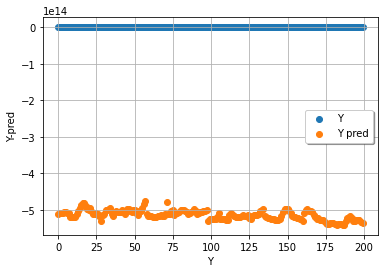

Parametros recibidos:
	 random_subsampling sgd 30 0


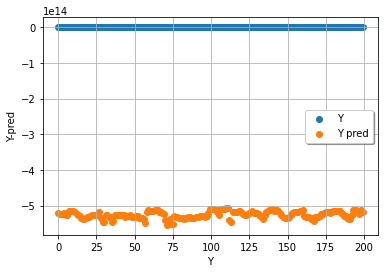

Parametros recibidos:
	 kfold sgd 5 0


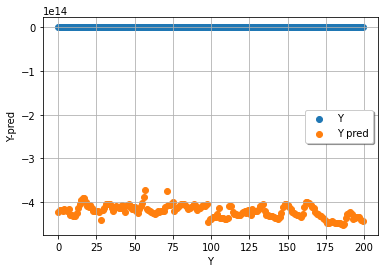

Parametros recibidos:
	 kfold sgd 10 0


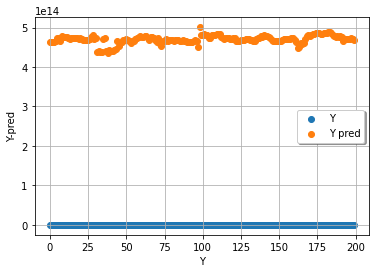

________________sgd________________
╒════════════════════╤════════╤══════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│ SPLIT METHOD       │      r │           r2 │         sse │         mae │         mse │        rmse │
╞════════════════════╪════════╪══════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ holdout            │ -0.143 │ -2.02353e+27 │ 3.1097e+33  │ 5.21937e+14 │ 2.72733e+29 │ 5.22238e+14 │
├────────────────────┼────────┼──────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ random_subsampling │ -0.223 │ -1.06599e+27 │ 4.07029e+32 │ 3.307e+14   │ 1.42767e+29 │ 3.31366e+14 │
├────────────────────┼────────┼──────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ kfold              │  0.041 │ -2.03182e+27 │ 1.54265e+33 │ 5.07794e+14 │ 2.70605e+29 │ 5.08178e+14 │
├────────────────────┼────────┼──────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ kfold              │ -0.037 │ -1.41

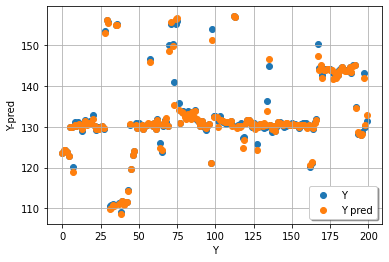

Parametros recibidos:
	 random_subsampling randomforest 30 0


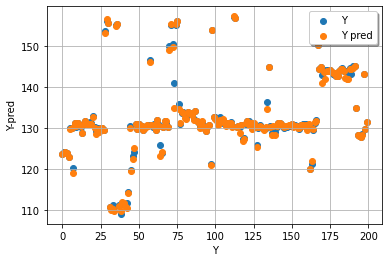

Parametros recibidos:
	 kfold randomforest 5 0


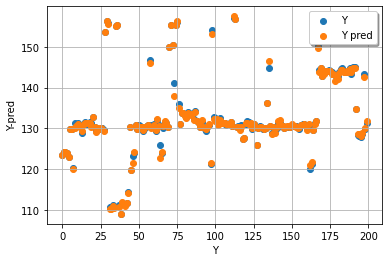

Parametros recibidos:
	 kfold randomforest 10 0


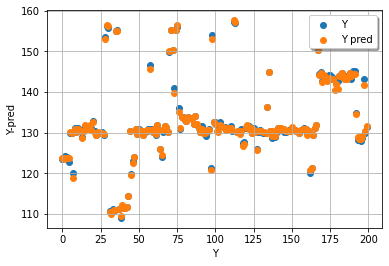

________________randomforest________________
╒════════════════════╤═══════╤═══════╤═════════╤═══════╤═══════╤════════╕
│ SPLIT METHOD       │     r │    r2 │     sse │   mae │   mse │   rmse │
╞════════════════════╪═══════╪═══════╪═════════╪═══════╪═══════╪════════╡
│ holdout            │ 0.998 │ 0.996 │ 6282.91 │ 0.493 │ 0.551 │  0.742 │
├────────────────────┼───────┼───────┼─────────┼───────┼───────┼────────┤
│ random_subsampling │ 0.998 │ 0.996 │ 1356.55 │ 0.455 │ 0.476 │  0.689 │
├────────────────────┼───────┼───────┼─────────┼───────┼───────┼────────┤
│ kfold              │ 0.998 │ 0.996 │ 2806.72 │ 0.465 │ 0.492 │  0.702 │
├────────────────────┼───────┼───────┼─────────┼───────┼───────┼────────┤
│ kfold              │ 0.998 │ 0.996 │ 1353.4  │ 0.455 │ 0.475 │  0.689 │
╘════════════════════╧═══════╧═══════╧═════════╧═══════╧═══════╧════════╛
Parametros recibidos:
	 holdout mlp 5 0.6


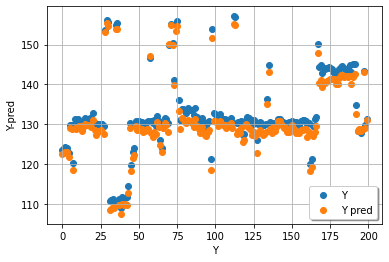

Parametros recibidos:
	 random_subsampling mlp 30 0


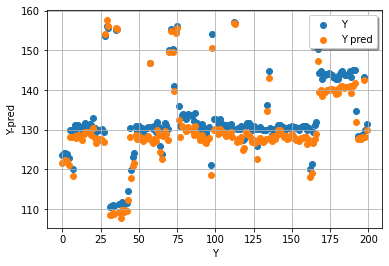

Parametros recibidos:
	 kfold mlp 5 0


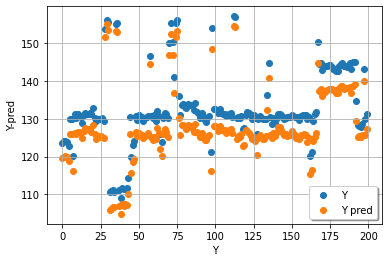

Parametros recibidos:
	 kfold mlp 10 0


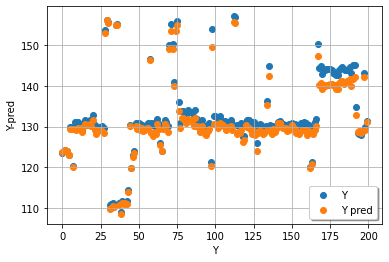

________________mlp________________
╒════════════════════╤═══════╤═══════╤═══════════╤═══════╤════════╤════════╕
│ SPLIT METHOD       │     r │    r2 │       sse │   mae │    mse │   rmse │
╞════════════════════╪═══════╪═══════╪═══════════╪═══════╪════════╪════════╡
│ holdout            │ 0.99  │ 0.981 │  28298.8  │ 1.093 │  2.482 │  1.575 │
├────────────────────┼───────┼───────┼───────────┼───────┼────────┼────────┤
│ random_subsampling │ 0.991 │ 0.976 │   9296.89 │ 1.319 │  3.261 │  1.782 │
├────────────────────┼───────┼───────┼───────────┼───────┼────────┼────────┤
│ kfold              │ 0.988 │ 0.845 │ 117122    │ 3.719 │ 20.546 │  4.108 │
├────────────────────┼───────┼───────┼───────────┼───────┼────────┼────────┤
│ kfold              │ 0.989 │ 0.971 │  10948.3  │ 1.427 │  3.841 │  1.919 │
╘════════════════════╧═══════╧═══════╧═══════════╧═══════╧════════╧════════╛
['kfold', 'randomforest']


In [27]:
best_row = [0,0,0,0,0,0]
best_combination = ['split', 'regressor']
for regression_method in regression_methods:
    i = 0
    table = []
    head_table = ["SPLIT METHOD","r","r2", "sse", "mae","mse","rmse"]
    table.append(head_table)
    for split_method in split_methods:
        if(i == 0):
            rObj = regressor(X,y,split_method,regression_method, 5, 0.6)
        if(i == 1):
            rObj = regressor(X,y,split_method,regression_method, 30, 0)
        if(i == 2):
            rObj = regressor(X,y,split_method,regression_method, 5, 0)
        if(i == 3):
            rObj = regressor(X,y,split_method,regression_method, 10, 0)
        i+=1
        rObj.regression()
        r, r2, sse, mae, mse, rmse = rObj.getMetrics()
        row = [split_method,
               float("{:.3f}".format(r)), 
               float("{:.3f}".format(r2)), 
               float("{:.3f}".format(sse)), 
               float("{:.3f}".format(mae)), 
               float("{:.3f}".format(mse)), 
               float("{:.3f}".format(rmse)) ]
        from statistics import mean
        import warnings
        warnings.filterwarnings('ignore')
        if(mean([row[1],row[2]]) > mean([best_row[1],best_row[2]]) or
             mean([row[3],row[4],row[5],row[6]]) < mean([best_row[3],best_row[4],best_row[5],best_row[6]])):
            best_row = row
            best_combination = [split_method, regression_method]
        table.append(row)
    print("________________{}________________".format(regression_method))
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
print(best_combination)

In [28]:
from sklearn.model_selection import RandomizedSearchCV
import random
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.6)

params = {
    "n_estimators": range(5, 120),
    "max_depth": range(0, 15),
    "min_samples_split": range(0, 20),
    "min_samples_leaf": range(0, 5),
    #"criterion": ['squared_error', 'absolute_error', 'poisson'],
    #"max_features": ['sqrt', 'log2'],
}
randomizedCV = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions =params, verbose=2, cv = 5, n_iter = 5, n_jobs=-1)
randomizedCV.fit(X_train, y_train)
while(randomizedCV.best_score_ < 0.996):
    randomizedCV.fit(X_train, y_train)
    print(randomizedCV.best_score_)
randomizedCV.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9839811471429452
Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9953818694732968
Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9956608599410105
Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9915339344771124
Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.994894887234814
Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9914077574427397
Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9959714379658854
Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9959387516853869
Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9961292369860676


{'n_estimators': 104,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_depth': 14}

Parametros recibidos:
	 holdout randomforest 5 0.6


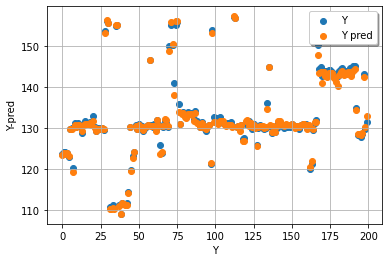

Parametros recibidos:
	 kfold randomforest 5 0


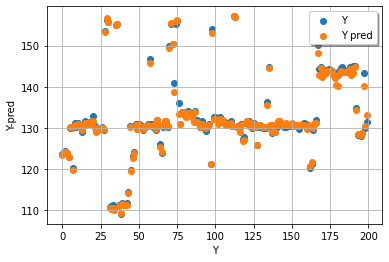

________________randomforest________________
╒════════════════╤═══════╤═══════╤═════════╤═══════╤═══════╤════════╕
│ SPLIT METHOD   │     r │    r2 │     sse │   mae │   mse │   rmse │
╞════════════════╪═══════╪═══════╪═════════╪═══════╪═══════╪════════╡
│ holdout        │ 0.998 │ 0.996 │ 5569.79 │ 0.467 │ 0.488 │  0.699 │
├────────────────┼───────┼───────┼─────────┼───────┼───────┼────────┤
│ kfold          │ 0.998 │ 0.997 │ 2513.19 │ 0.448 │ 0.441 │  0.664 │
╘════════════════╧═══════╧═══════╧═════════╧═══════╧═══════╧════════╛
Tiempo de ejecucion:  143.01913189888  segundos
['kfold', 'randomforest']


In [32]:
'''
{'n_estimators': 104,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_depth': 14}

'''


split_methods = ['holdout', 'kfold', 'kfold']   
regression_methods = ['randomforest']
best_row = [0,0,0,0,0,0]
best_combination = ['split', 'regressor']
for regression_method in regression_methods:
    start_time = time.time()
    i = 0
    table = []
    head_table = ["SPLIT METHOD","r","r2", "sse", "mae","mse","rmse"]
    table.append(head_table)
    for split_method in split_methods:
        if(i == 0):
            rObj = regressor(X,y,split_method,regression_method, 5, 0.6)
        if(i == 1):
            i+=1
            continue
        if(i == 2):
            rObj = regressor(X,y,split_method,regression_method, 5, 0)
        if(i == 3):
            rObj = regressor(X,y,split_method,regression_method, 10, 0)
        i+=1
        rObj.regression()
        r, r2, sse, mae, mse, rmse = rObj.getMetrics()
        row = [split_method,
               float("{:.3f}".format(r)), 
               float("{:.3f}".format(r2)), 
               float("{:.3f}".format(sse)), 
               float("{:.3f}".format(mae)), 
               float("{:.3f}".format(mse)), 
               float("{:.3f}".format(rmse)) ]
        from statistics import mean
        import warnings
        warnings.filterwarnings('ignore')
        if(mean([row[1],row[2]]) > mean([best_row[1],best_row[2]]) or
             mean([row[3],row[4],row[5],row[6]]) < mean([best_row[3],best_row[4],best_row[5],best_row[6]])):
            best_row = row
            best_combination = [split_method, regression_method]
        table.append(row)
    print("________________{}________________".format(regression_method))
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
    end_time = time.time()
    print("Tiempo de ejecucion: ", end_time - start_time, " segundos")
print(best_combination)